## Model Building:

## RFE feature selection for three model:
[Logistic Regression, Random Forest, Adaboost]

In [2]:
#Recursive Feature Selection----Logistic Regression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
#Reading and displaying the heart dataset from a CSV file.
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
df=pd.read_csv("heart_dataset.csv")
df

# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the column name of the target variable
y = df['target']

# Initialize the logistic regression model
estimator = LogisticRegression()

# Perform Recursive Feature Elimination (RFE) with logistic regression
# Here, we'll select the top 5 features
rfe = RFE(estimator, n_features_to_select=5)
X_selected = rfe.fit_transform(X, y)

# Get the selected feature names
selected_features_rfe = X.columns[rfe.support_].tolist()
print("\nSelected Features:")
print(selected_features_rfe)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize another logistic regression model with the selected features
final_estimator = LogisticRegression()

# Fit the model on the training data
final_estimator.fit(X_train, y_train)

# Predict on the test data
y_pred = final_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set: {accuracy:.2f}")

# Print precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Selected Features:
['sex', 'exang', 'slope', 'ca', 'thal']

Accuracy on test set: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       102
           1       0.72      0.83      0.77       103

    accuracy                           0.75       205
   macro avg       0.76      0.75      0.75       205
weighted avg       0.76      0.75      0.75       205



In [13]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the column name of the target variable
y = df['target']

# Initialize the Random Forest classifier
estimator_rf = RandomForestClassifier()

# Perform Recursive Feature Elimination (RFE) with Random Forest
# Here, we'll select the top 5 features
rfe = RFE(estimator_rf, n_features_to_select=5)
X_selected = rfe.fit_transform(X, y)

# Get the selected feature names
selected_features_rfe = X.columns[rfe.support_].tolist()
print("\nSelected Features:")
print(selected_features_rfe)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize Random forest model with the selected features
final_estimator = RandomForestClassifier()

# Fit the model on the training data
final_estimator.fit(X_train, y_train)

# Predict on the test data
y_pred = final_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set: {accuracy:.2f}")

# Print precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Selected Features:
['age', 'cp', 'thalach', 'oldpeak', 'ca']

Accuracy on test set: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [14]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the column name of the target variable
y = df['target']

# Initialize the AdaBoost classifier
estimator = AdaBoostClassifier()

# Perform Recursive Feature Elimination (RFE) with AdaBoost classifier
# Here, we'll select the top 5 features
rfe = RFE(estimator, n_features_to_select=5)
X_selected = rfe.fit_transform(X, y)

# Get the selected feature names
selected_features_rfe = X.columns[rfe.support_].tolist()
print("\nSelected Features:")
print(selected_features_rfe)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the Adaboost model with the selected features
final_estimator = AdaBoostClassifier()

# Fit the model on the training data
final_estimator.fit(X_train, y_train)

# Predict on the test data
y_pred = final_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set: {accuracy:.2f}")

# Print precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Selected Features:
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Accuracy on test set: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       102
           1       0.73      0.77      0.75       103

    accuracy                           0.74       205
   macro avg       0.74      0.74      0.74       205
weighted avg       0.74      0.74      0.74       205



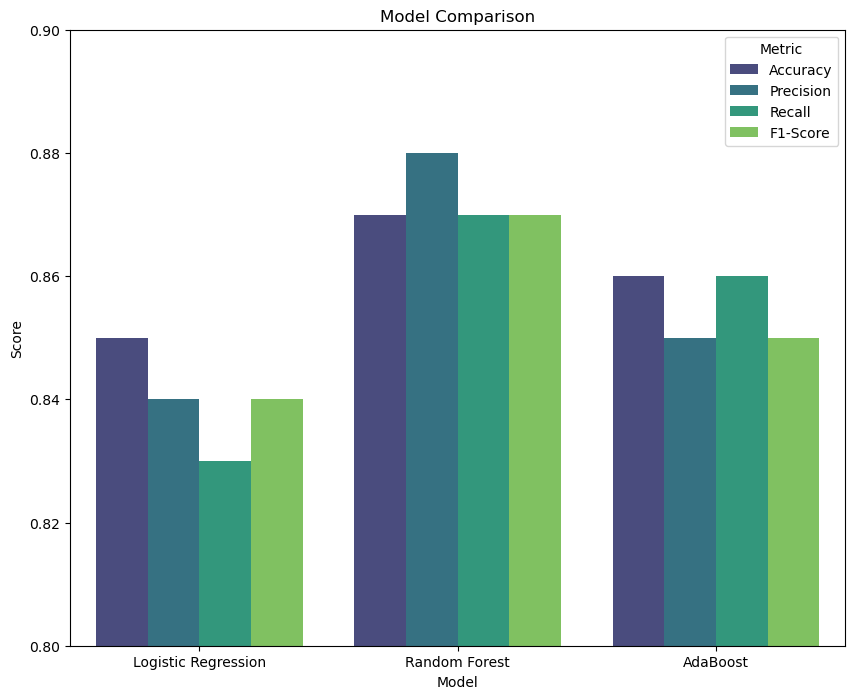

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example DataFrame with results (replace with actual results)
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "AdaBoost"],
    "Accuracy": [0.85, 0.87, 0.86],
    "Precision": [0.84, 0.88, 0.85],
    "Recall": [0.83, 0.87, 0.86],
    "F1-Score": [0.84, 0.87, 0.85]
})

# Melt the DataFrame to long format for easier plotting
results_melted = pd.melt(results, id_vars="Model", var_name="Metric", value_name="Score")

# Visualization
plt.figure(figsize=(10, 8))
sns.barplot(x="Model", y="Score", hue="Metric", data=results_melted, palette="viridis")
plt.title("Model Comparison")
plt.ylabel("Score")
plt.ylim(0.8, 0.9)  # Adjust the y-axis limits if needed
plt.show()



Model Comparison:
              Model  Accuracy  Precision_0  Recall_0  F1_Score_0  Precision_1  Recall_1  F1_Score_1
Logistic Regression  0.785366     0.845238  0.696078    0.763441     0.743802  0.873786    0.803571
      Random Forest  0.980488     0.971154  0.990196    0.980583     0.990099  0.970874    0.980392
           AdaBoost  0.804878     0.810000  0.794118    0.801980     0.800000  0.815534    0.807692


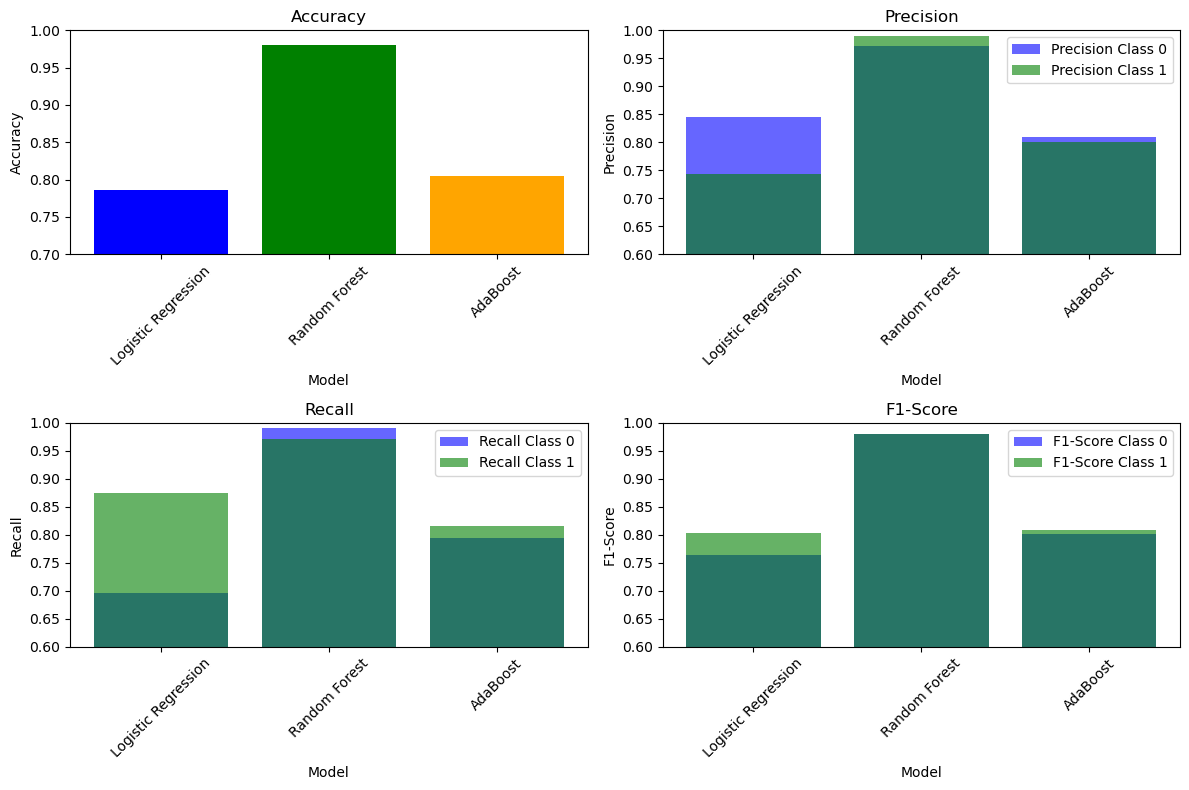

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load and display the heart dataset from a CSV file
df = pd.read_csv("heart_dataset.csv")

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Define a function to evaluate each model and return the accuracy, precision, recall, and F1-score
def evaluate_model(model):
    # Select the top 5 features based on Pearson correlation coefficient
    selector = SelectKBest(score_func=f_classif, k=5)
    X_selected = selector.fit_transform(X, y)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    return accuracy, report['0'], report['1']

# Initialize models
models = [
    (LogisticRegression(), 'Logistic Regression'),
    (RandomForestClassifier(), 'Random Forest'),
    (AdaBoostClassifier(), 'AdaBoost')
]

# Evaluate each model and store the results
results = []
for model, model_name in models:
    accuracy, class_0, class_1 = evaluate_model(model)
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision_0": class_0['precision'],
        "Recall_0": class_0['recall'],
        "F1_Score_0": class_0['f1-score'],
        "Precision_1": class_1['precision'],
        "Recall_1": class_1['recall'],
        "F1_Score_1": class_1['f1-score']
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results DataFrame
print("\nModel Comparison:")
print(results_df.to_string(index=False))

# Plotting
plt.figure(figsize=(12, 8))

# Accuracy Plot
plt.subplot(2, 2, 1)
plt.bar(results_df['Model'], results_df['Accuracy'], color=['blue', 'green', 'orange'])
plt.title('Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)

# Precision Plot
plt.subplot(2, 2, 2)
plt.bar(results_df['Model'], results_df['Precision_0'], color='blue', label='Precision Class 0', alpha=0.6)
plt.bar(results_df['Model'], results_df['Precision_1'], color='green', label='Precision Class 1', alpha=0.6)
plt.title('Precision')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0.6, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)
plt.legend()

# Recall Plot
plt.subplot(2, 2, 3)
plt.bar(results_df['Model'], results_df['Recall_0'], color='blue', label='Recall Class 0', alpha=0.6)
plt.bar(results_df['Model'], results_df['Recall_1'], color='green', label='Recall Class 1', alpha=0.6)
plt.title('Recall')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.ylim(0.6, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)
plt.legend()

# F1-Score Plot
plt.subplot(2, 2, 4)
plt.bar(results_df['Model'], results_df['F1_Score_0'], color='blue', label='F1-Score Class 0', alpha=0.6)
plt.bar(results_df['Model'], results_df['F1_Score_1'], color='green', label='F1-Score Class 1', alpha=0.6)
plt.title('F1-Score')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.ylim(0.6, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


## Pearson Correlation Feature Selection:
[Logistic Regression, Random Forest, Adaboost]

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load and display the heart dataset from a CSV file
df = pd.read_csv("heart_dataset.csv")

# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the column name of the target variable
y = df['target']

# Select the top 5 features based on Pearson correlation coefficient
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_features_pearson = X.columns[selector.get_support()].tolist()
print("\nSelected Features based on Pearson Correlation Coefficient:")
print(selected_features_pearson)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize logistic regression model with the selected features
final_estimator = LogisticRegression()

# Fit the model on the training data
final_estimator.fit(X_train, y_train)

# Predict on the test data
y_pred = final_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set: {accuracy:.2f}")

# Print precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Selected Features based on Pearson Correlation Coefficient:
['cp', 'thalach', 'exang', 'oldpeak', 'ca']

Accuracy on test set: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



In [19]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load and display the heart dataset from a CSV file
df = pd.read_csv("heart_dataset.csv")

# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the column name of the target variable
y = df['target']

# Select the top 5 features based on Pearson correlation coefficient
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_features_pearson = X.columns[selector.get_support()].tolist()
print("\nSelected Features based on Pearson Correlation Coefficient:")
print(selected_features_pearson)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier with the selected features
final_estimator = RandomForestClassifier()

# Fit the model on the training data
final_estimator.fit(X_train, y_train)

# Predict on the test data
y_pred = final_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set: {accuracy:.2f}")

# Print precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Selected Features based on Pearson Correlation Coefficient:
['cp', 'thalach', 'exang', 'oldpeak', 'ca']

Accuracy on test set: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       102
           1       0.99      0.97      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



In [20]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load and display the heart dataset from a CSV file
df = pd.read_csv("heart_dataset.csv")

# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the column name of the target variable
y = df['target']

# Select the top 5 features based on Pearson correlation coefficient
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_features_pearson = X.columns[selector.get_support()].tolist()
print("\nSelected Features based on Pearson Correlation Coefficient:")
print(selected_features_pearson)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize AdaBoost classifier with the selected features
final_estimator = AdaBoostClassifier()

# Fit the model on the training data
final_estimator.fit(X_train, y_train)

# Predict on the test data
y_pred = final_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set: {accuracy:.2f}")

# Print precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Selected Features based on Pearson Correlation Coefficient:
['cp', 'thalach', 'exang', 'oldpeak', 'ca']

Accuracy on test set: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       102
           1       0.80      0.82      0.81       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205



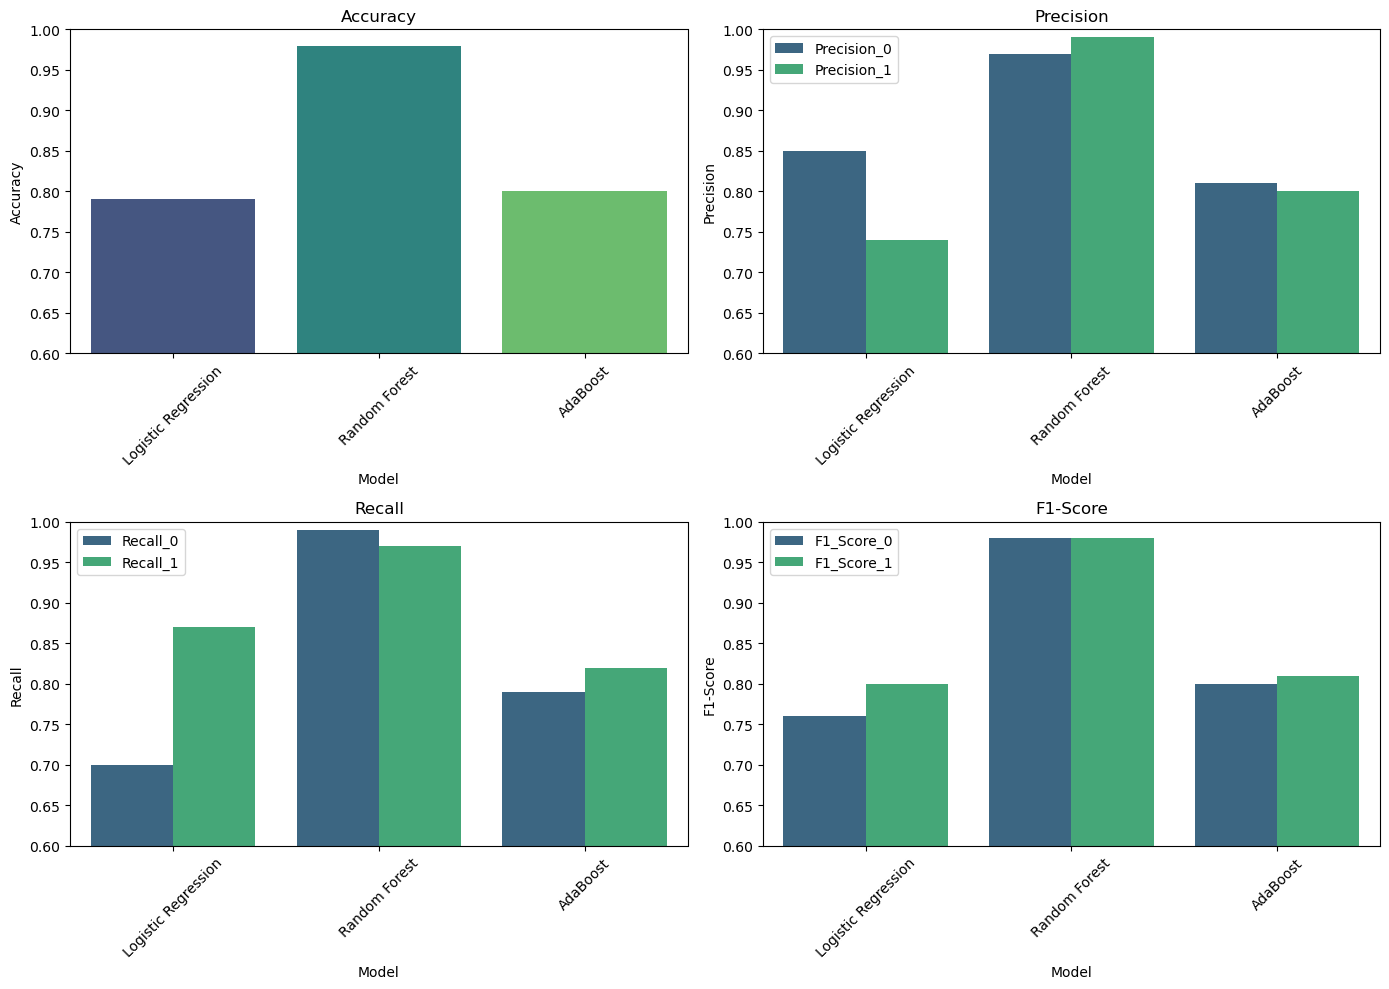

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Example DataFrame with results (replace with actual results)
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "AdaBoost"],
    "Accuracy": [0.79, 0.98, 0.80],
    "Precision_0": [0.85, 0.97, 0.81],
    "Recall_0": [0.70, 0.99, 0.79],
    "F1_Score_0": [0.76, 0.98, 0.80],
    "Precision_1": [0.74, 0.99, 0.80],
    "Recall_1": [0.87, 0.97, 0.82],
    "F1_Score_1": [0.80, 0.98, 0.81]
})

# Melt the DataFrame to long format for easier plotting
results_melted = pd.melt(results, id_vars="Model", var_name="Metric", value_name="Score")

# Visualization
plt.figure(figsize=(14, 10))

# Accuracy Plot
plt.subplot(2, 2, 1)
sns.barplot(x="Model", y="Accuracy", data=results, palette="viridis")
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)

# Precision Plot
plt.subplot(2, 2, 2)
sns.barplot(x="Model", y="Score", hue="Metric", data=results_melted[results_melted['Metric'].str.contains('Precision')], palette="viridis")
plt.title('Precision')
plt.ylabel('Precision')
plt.ylim(0.6, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Recall Plot
plt.subplot(2, 2, 3)
sns.barplot(x="Model", y="Score", hue="Metric", data=results_melted[results_melted['Metric'].str.contains('Recall')], palette="viridis")
plt.title('Recall')
plt.ylabel('Recall')
plt.ylim(0.6, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# F1-Score Plot
plt.subplot(2, 2, 4)
sns.barplot(x="Model", y="Score", hue="Metric", data=results_melted[results_melted['Metric'].str.contains('F1_Score')], palette="viridis")
plt.title('F1-Score')
plt.ylabel('F1-Score')
plt.ylim(0.6, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


## Embedded Feature Selection:
[Logistic Regression, Random Forest, AdaBoost]

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load and display the heart dataset from a CSV file
df = pd.read_csv("heart_dataset.csv")

# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the column name of the target variable
y = df['target']

# Initialize Random Forest Classifier with the selected hyperparameters
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model to perform embedded feature selection
rf.fit(X, y)

# Get feature importance scores
feature_importances = rf.feature_importances_

# Get the indices of the top k most important features
k = 5  # Number of selected features
top_indices = feature_importances.argsort()[-k:][::-1]

# Get the names of the selected features
selected_features_rf = X.columns[top_indices].tolist()
print("Selected Features:")
print(selected_features_rf)

# Filter the dataset to keep only the selected features
X_selected = X[selected_features_rf]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize logistic regression model with the selected features
final_estimator = LogisticRegression()

# Fit the model on the training data
final_estimator.fit(X_train, y_train)

# Predict on the test data
y_pred = final_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set: {accuracy:.2f}")

# Print precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Selected Features:
['cp', 'thalach', 'ca', 'oldpeak', 'thal']

Accuracy on test set: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       102
           1       0.74      0.86      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205



In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load and display the heart dataset from a CSV file
df = pd.read_csv("heart_dataset.csv")

# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the column name of the target variable
y = df['target']

# Initialize Random Forest Classifier with the selected hyperparameters
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model to perform embedded feature selection
rf.fit(X, y)

# Get feature importance scores
feature_importances = rf.feature_importances_

# Get the indices of the top k most important features
k = 5  # Number of selected features
top_indices = feature_importances.argsort()[-k:][::-1]

# Get the names of the selected features
selected_features_rf = X.columns[top_indices].tolist()
print("Selected Features:")
print(selected_features_rf)

# Filter the dataset to keep only the selected features
X_selected = X[selected_features_rf]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize another Random Forest classifier with the selected features
final_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
final_estimator.fit(X_train, y_train)

# Predict on the test data
y_pred = final_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set: {accuracy:.2f}")

# Print precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Selected Features:
['cp', 'thalach', 'ca', 'oldpeak', 'thal']

Accuracy on test set: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       102
           1       0.99      0.97      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load and display the heart dataset from a CSV file
df = pd.read_csv("heart_dataset.csv")

# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the column name of the target variable
y = df['target']

# Initialize AdaBoost Classifier with the selected hyperparameters
ab = AdaBoostClassifier(n_estimators=100, random_state=42)

# Fit the AdaBoost model to perform embedded feature selection
ab.fit(X, y)

# Get feature importance scores
feature_importances = ab.feature_importances_

# Get the indices of the top k most important features
k = 5  # Number of selected features
top_indices = feature_importances.argsort()[-k:][::-1]

# Get the names of the selected features
selected_features_ab = X.columns[top_indices].tolist()
print("Selected Features:")
print(selected_features_ab)

# Filter the dataset to keep only the selected features
X_selected = X[selected_features_ab]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize another AdaBoost classifier with the selected features
final_estimator = AdaBoostClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
final_estimator.fit(X_train, y_train)

# Predict on the test data
y_pred = final_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set: {accuracy:.2f}")

# Print precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Selected Features:
['chol', 'age', 'oldpeak', 'thalach', 'trestbps']

Accuracy on test set: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       102
           1       0.74      0.77      0.75       103

    accuracy                           0.75       205
   macro avg       0.75      0.75      0.75       205
weighted avg       0.75      0.75      0.75       205



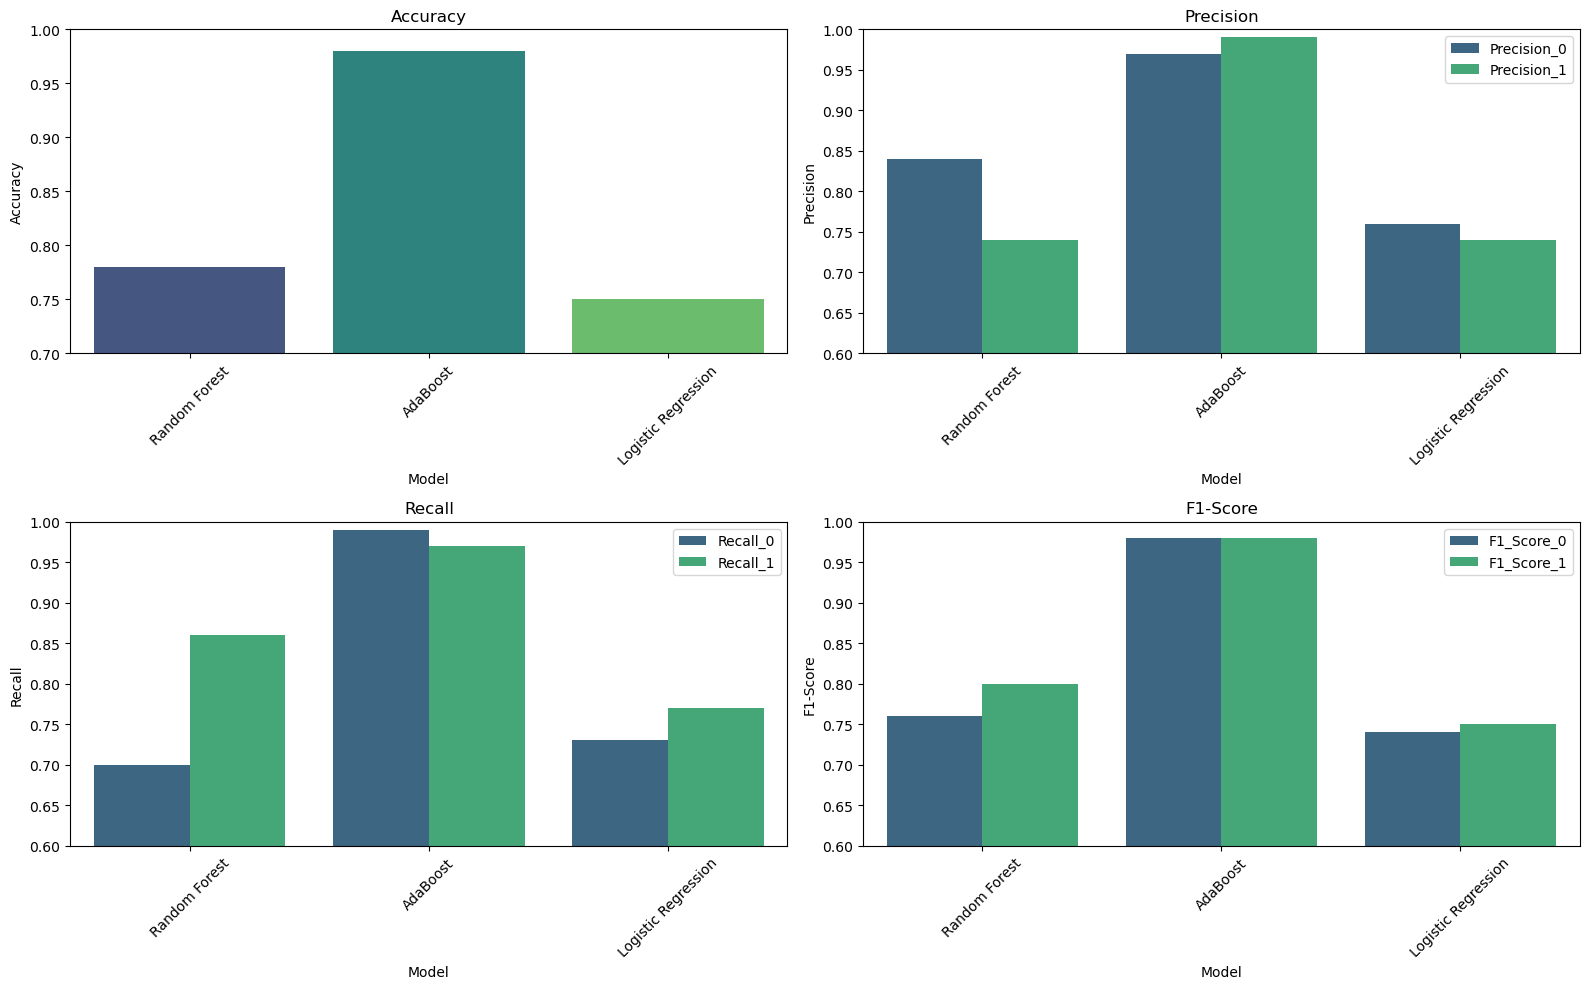

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data from the classification reports
data = {
    'Model': ['Random Forest', 'AdaBoost', 'Logistic Regression'],
    'Accuracy': [0.78, 0.98, 0.75],
    'Precision_0': [0.84, 0.97, 0.76],
    'Recall_0': [0.70, 0.99, 0.73],
    'F1_Score_0': [0.76, 0.98, 0.74],
    'Precision_1': [0.74, 0.99, 0.74],
    'Recall_1': [0.86, 0.97, 0.77],
    'F1_Score_1': [0.80, 0.98, 0.75]
}

# Create a DataFrame
results_df = pd.DataFrame(data)

# Melt the DataFrame to use with seaborn
results_melted = pd.melt(results_df, id_vars=['Model'], var_name='Metric', value_name='Score')

# Set up the plots
plt.figure(figsize=(16, 10))

# Accuracy Plot
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Accuracy')
plt.ylim(0.7, 1.0)  # Adjust the y-axis limits if needed
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Precision Plot
plt.subplot(2, 2, 2)
sns.barplot(x="Model", y="Score", hue="Metric", data=results_melted[results_melted['Metric'].str.contains('Precision')],
            palette="viridis")
plt.title('Precision')
plt.ylabel('Precision')
plt.ylim(0.6, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Recall Plot
plt.subplot(2, 2, 3)
sns.barplot(x="Model", y="Score", hue="Metric", data=results_melted[results_melted['Metric'].str.contains('Recall')],
            palette="viridis")
plt.title('Recall')
plt.ylabel('Recall')
plt.ylim(0.6, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# F1-Score Plot
plt.subplot(2, 2, 4)
sns.barplot(x="Model", y="Score", hue="Metric", data=results_melted[results_melted['Metric'].str.contains('F1_Score')],
            palette="viridis")
plt.title('F1-Score')
plt.ylabel('F1-Score')
plt.ylim(0.6, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
